In [807]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt
from pypfopt import risk_models, expected_returns, plotting
import plotly.express as px
from pypfopt import EfficientFrontier
#conda install -c plotly chart-studio
from chart_studio import plotly
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
from sympy import symbols, solve

# Importing data

In [808]:
esg_data = pd.read_excel('esg.xlsx', header=[0,1], index_col=0)
esg_data

Last Price                                              \
           AAPL US Equity TSLA US Equity MSFT US Equity UEC US Equity   
2006-12-31          2.750          0.000        29.8600        0.0000   
2007-12-31          7.074          0.000        35.6000        3.0600   
2008-12-31          3.048          0.000        19.4400        2.1800   
2009-12-31          7.526          0.000        30.4800        3.7800   
2010-12-31         11.520          1.775        27.9100        6.0400   
2011-12-30         14.464          1.904        25.9600        3.0600   
2012-12-31         19.006          2.258        26.7097        2.5600   
2013-12-31         20.036         10.029        37.4100        2.0000   
2014-12-31         27.595         14.827        46.4500        1.7500   
2015-12-31         26.315         16.001        55.4800        1.0600   
2016-12-30         28.955         14.246        62.1400        1.1200   
2017-12-29         42.308         20.757        85.5400        1.7700   
2018-12-31         39.435         22.187       101.5700        1.2500   
2019-12-31         73.413         27.889       157.7000        0.9192   
2020-12-31        132.690        235.223       222.4200        1.7600   
2021-12-31        177.570        352.260       336.3200        3.3500   
2022-12-30        129.930        386.900       239.8200        3.8800   

                                                                       \
           DIS US Equity F US Equity EBAY US Equity MAERSKB DC Equity   
2006-12-31       33.8144        7.51        13.8100        1647.31000   
2007-12-31       32.2800        6.73        13.9689        1878.78176   
2008-12-31       22.6900        2.29         5.8755         931.44229   
2009-12-31       32.2500       10.00         9.9033        1234.63323   
2010-12-31       37.5100       16.79        11.7130        1573.08887   
2011-12-30       37.5000       10.76        12.7652        1157.34675   
2012-12-31       49.7900       12.95        21.4638        1321.70687   
2013-12-31       76.4000       15.43        23.0915        1905.90254   
2014-12-31       94.1900       15.50        23.6197        1767.69623   
2015-12-31      105.0800       14.09        27.4800        1148.66194   
2016-12-30      104.2200       12.13        29.6900        1399.27627   
2017-12-29      107.5100       12.49        37.7400        1532.24543   
2018-12-31      109.6500        7.65        28.0700        1097.52898   
2019-12-31      144.6300        9.30        36.1100        1442.01474   
2020-12-31      181.1800        8.79        50.2500        2245.62273   
2021-12-31      154.8900       20.77        66.5000        3568.22228   
2022-12-30       86.8800       11.63        41.4700        2249.87757   

                                       ... Governance Disclosure score  \
           MCD US Equity BA US Equity  ...              MNST US Equity   
2006-12-31         42.18        64.17  ...                      0.0000   
2007-12-31         58.91        87.46  ...                      0.0000   
2008-12-31         62.19        42.67  ...                      0.0000   
2009-12-31         62.44        54.13  ...                      0.0000   
2010-12-31         76.76        65.26  ...                      0.0000   
2011-12-30        100.33        73.35  ...                      0.0000   
2012-12-31         88.21        75.36  ...                      0.0000   
2013-12-31         97.03       136.49  ...                     74.6237   
2014-12-31         93.70       129.98  ...                     74.6237   
2015-12-31        118.14       144.59  ...                     84.2866   
2016-12-30        121.72       155.68  ...                     84.9789   
2017-12-29        172.12       294.91  ...                     84.4070   
2018-12-31        177.57       322.50  ...                     84.9789   
2019-12-31        197.61       325.76  ...                     84.9789   
2020-12-31        214.58       214.06  ...             

In [809]:
temp = esg_data['Last Price'].pct_change()
esg_last_price_tmp = temp.replace([np.inf, -np.inf], np.nan).dropna()
esg_last_price = esg_last_price_tmp.iloc[1:,:5]
esg_last_price


,AAPL US Equity,TSLA US Equity,MSFT US Equity,UEC US Equity,DIS US Equity
2012-12-31,0.314021,0.185924,0.028879,-0.163399,0.327733
2013-12-31,0.054193,3.441541,0.400615,-0.218750,0.534445
2014-12-31,0.377271,0.478413,0.241647,-0.125000,0.232853
2015-12-31,-0.046385,0.079180,0.194403,-0.394286,0.115617
2016-12-30,0.100323,-0.109681,0.120043,0.056604,-0.008184
2017-12-29,0.461164,0.457041,0.376569,0.580357,0.031568
2018-12-31,-0.067907,0.068892,0.187398,-0.293785,0.019905
2019-12-31,0.861620,0.256997,0.552624,-0.264640,0.319015
2020-12-31,0.807446,7.434257,0.410399,0.914708,0.252714
2021-12-31,0.338232,0.497558,0.512094,0.903409,-0.145104


## Covariance matrix

In [810]:
def cov_matrix(stocks):
    # Extract the data
    labels = stocks.columns
    X = stocks.values

    # Extract the number of rows and columns
    N, M = stocks.shape

    # Calculate the covariance matrix
    cov = np.zeros((M, M))

    for i in range(M):

        # Mean of column "i"
        mean_i = np.sum(X[:, i]) / N

        for j in range(M):

            # Mean of column "j"
            mean_j = np.sum(X[:, j]) / N

            # Covariance between column "i" and column "j"
            cov[i, j] = np.sum((X[:, i] - mean_i) * (X[:, j] - mean_j)) / (N - 1)
        cov_df = pd.DataFrame(cov, index=labels, )
        cov_df.columns = labels
    return cov_df

In [811]:
labels = esg_last_price.columns
labels

Index(['AAPL US Equity', 'TSLA US Equity', 'MSFT US Equity', 'UEC US Equity',
       'DIS US Equity'],
      dtype='object')

In [812]:
cov_a = cov_matrix(esg_last_price)
cov_a

,AAPL US Equity,TSLA US Equity,MSFT US Equity,UEC US Equity,DIS US Equity
AAPL US Equity,0.127277,0.354790,0.061396,0.066750,0.044352
TSLA US Equity,0.354790,5.282992,0.189882,0.521034,0.242824
MSFT US Equity,0.061396,0.189882,0.058585,0.033039,0.033965
UEC US Equity,0.066750,0.521034,0.033039,0.229892,-0.041714
DIS US Equity,0.044352,0.242824,0.033965,-0.041714,0.070146


In [813]:
# Compare with pandas covariance matrix
#pd_cov = returns.cov().values
#pd_cov_diff = np.sum(np.abs(cov - pd_cov))
#print('Difference from pandas cov. mat.: {:.6f}'.format(pd_cov_diff))

## Mean return of each stock

In [814]:
def mean_return(stocks):
    price = stocks.values

    labels = stocks.columns

    N, M = stocks.shape

    mean_re = np.zeros(M)

    for i in range(N):
        mean_re += price[i] / N
    #mean_re_df = pd.DataFrame(mean_re, index=labels, )
    return mean_re

In [815]:
return_mean = esg_last_price.mean()
return_mean

AAPL US Equity    0.266517
TSLA US Equity    1.171678
MSFT US Equity    0.248886
UEC US Equity     0.104857
DIS US Equity     0.112861
dtype: float64

In [816]:
mean_re = mean_return(esg_last_price)
mean_re


array([0.26651723, 1.1716781 , 0.24888558, 0.10485706, 0.11286148])

In [817]:
n = esg_last_price.to_numpy().shape[1]
n

5

## Rolling window covariance matrix and expected return

In [818]:
def rolling_er_cov(stocks, window):
    rolling_er = []
    rolling_cov = []
    for i in range(0,6):
        rolling_er.append(mean_return(stocks[i:i+window]))
        rolling_cov.append(cov_matrix(stocks[i:i+window]))
    return rolling_er, rolling_cov

In [819]:
er, cova = rolling_er_cov(esg_last_price, 5)

## Effecient frontier

In [820]:
Mean_re_vector = mean_re
covariance_matrix = cov_a

In [899]:
#Helper function to finde various performance measures for the portfolio
def portfolio_performance(return_mean,cov_matrix,num_portfolios,riskfree_rate=0):
    
    #Defining lists that are used later for calculations
    weight = np.zeros((num_portfolios,n))
    expectedReturn = np.zeros(num_portfolios)
    expectedVolatility = np.zeros(num_portfolios)
    SharpeRatio = np.zeros(num_portfolios)
    tickers_list = []
    mean_variance_pairs = []
    
    #We use a minimizer so we create a helper function find the negative sharpe ratio, which will be the highest
    def negativeSR(w):
        w = np.array(w)
        #Calculating volatility with help from numpy square root function
        V = np.sqrt(w.T @ cov_matrix @ w)
        #Calculating the expected return of our portfolio. Summing over each mean return for a stock multiplied by a weight - Making use of the numpy sum function
        R = np.sum(return_mean * w)
        SR = R/V
        return -1*SR

    #Helper function used as a constraint
    def checkSumToOne(w):
        return np.sum(w)-1

    #Function to calculate volatility, and to later minimize the volatility for a given target return
    def minimizeMyVolatility(w):
        w = np.array(w)
        V = np.sqrt(w.T @ cov_matrix @ w)
        return V

    #Function to calculate the expected return of a portfolio given certain weights
    def getReturn(w):
        w = np.array(w)
        R = np.sum(return_mean * w)
        return R    
    

    def minimize_getReturn(w):
        w = np.array(w)
        R = np.sum(return_mean * w)
        return -1*R   

    #Looping through each portfolio
    for k in range(num_portfolios):
        #next_i = False
        #while True:

            assets = np.random.choice(list(labels), len(labels), replace=False)
            # generate random weight vector
            w = np.array(np.random.random(n))
        
            #Normalize it
            w = w / np.sum(w)
        
            #Put the weight into the list
            weight[k,:] = w

        
            #Expected return in %
            expectedReturn[k] = np.sum(return_mean * w)
        
            #Expected volatility
            expectedVolatility[k] = np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))
        
            # Sharpe ratio
            SharpeRatio[k] = (expectedReturn[k]-riskfree_rate) / expectedVolatility[k]  

            
            #-- Skip over dominated portfolios
            #for R,V in mean_variance_pairs:
                #for k in range(num_portfolios):
                    #if (R > expectedReturn[k]) & (V < expectedVolatility[k]):
                        #next_i = True
                        #break
                #if next_i:
                    #break
            
            #mean_variance_pairs.append([expectedReturn, expectedVolatility])
            tickers_list.append(assets)  
        
    #Define the linspace for the target values
    frontier_y = np.linspace(expectedReturn.min(), expectedReturn.max(),100)
    
    #Empty list for optimal volatility weights
    volatility_opt = []
    

    #Create the initial guess
    w0 = n*[1./n]
    
    #Create the constraints, that the portfolio weights has to be between 0 and 1
    constraintSet = (0,1)
    bounds = tuple(constraintSet for asset in range(n))
    
    #Loop through each target value and find the optimal volatility
    for R in frontier_y:

        constraints = ({'type':'eq', 'fun':checkSumToOne},
                      {'type':'eq', 'fun': lambda w: getReturn(w) - R})
        #Minimizing the volatiliy
        opt = minimize(minimizeMyVolatility, w0, method='SLSQP', bounds=bounds, constraints=constraints)
        #Appending our minimized volatility to our empty list
        volatility_opt.append(opt['fun'])

        #highest_return = minimize(minimize_getReturn, w0, method='SLSQP', bounds=bounds, constraints=constraints)
        #return_opt.append[highest_return['fun']]


    #Find the optimal point with the highest sharpe ratio
    constraints = ({'type':'eq', 'fun':checkSumToOne})
    w_opt = minimize(negativeSR, w0, method='SLSQP', bounds=bounds, constraints=constraints).x
    sharpe_exp = getReturn(w_opt)
    sharpe_vol = minimizeMyVolatility(w_opt)

    #Find the point for the minimum variance portfolio
    w_min = minimize(minimizeMyVolatility, w0, method='SLSQP', bounds=bounds, constraints=constraints).x
    mvp_exp = getReturn(w_min)
    mvp_vol = minimizeMyVolatility(w_min)

    frontier_x = []

    for possible_return in frontier_y:
        cons = ({'type':'eq', 'fun':checkSumToOne},
                {'type':'eq', 'fun': lambda w: getReturn(w) - possible_return})
    
        result = minimize(minimizeMyVolatility,w0,method='SLSQP', bounds=bounds, constraints=cons)
        frontier_x.append(result['fun'])

    
    return expectedReturn, expectedVolatility, SharpeRatio, volatility_opt, (sharpe_exp,sharpe_vol,(sharpe_exp-riskfree_rate) / sharpe_vol), frontier_y, frontier_x, w_opt, mvp_exp, mvp_vol, weight, tickers_list

In [900]:
num_portfolios = 1000
expectedReturn, expectedVolatility, SharpeRatio, volatility_opt, sharpepoint, y_axis, x_axis, weightlist, mvp_exr, mvp_std, w, ticker = portfolio_performance(Mean_re_vector,covariance_matrix.to_numpy(),num_portfolios,riskfree_rate=0)

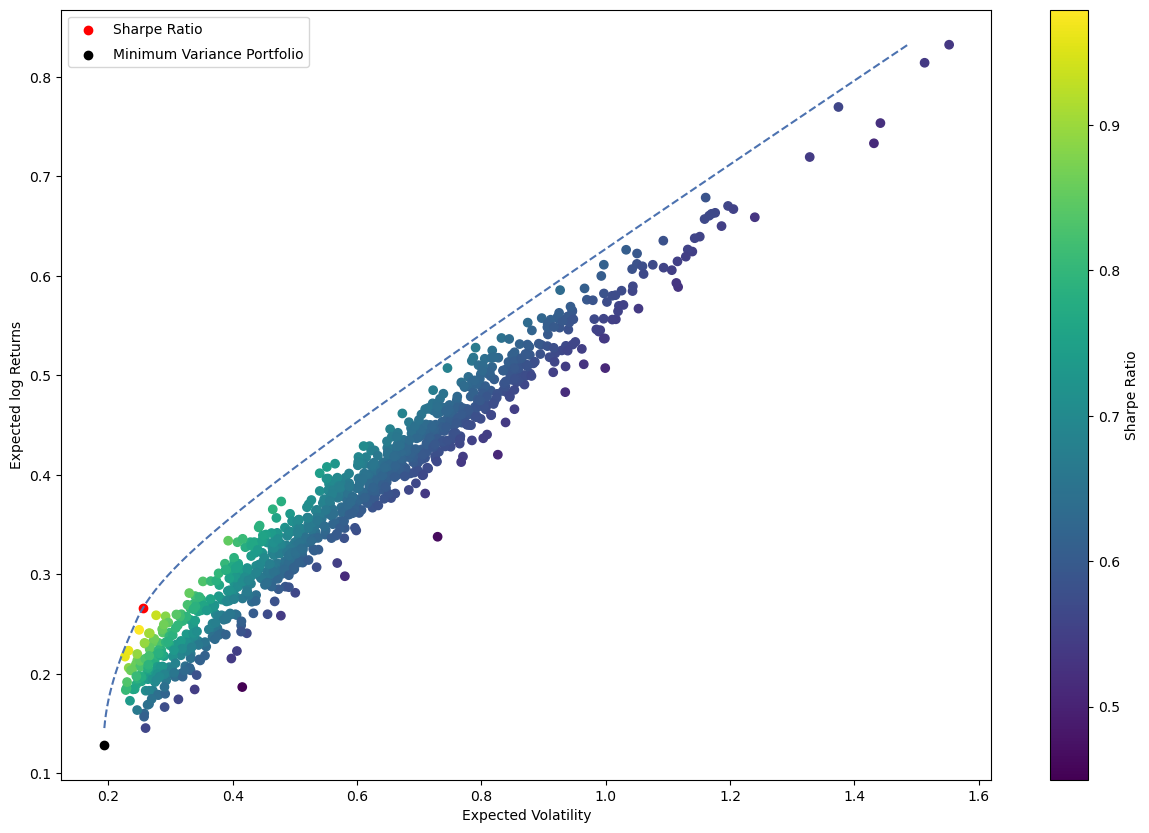

In [901]:
#Test plot to see if it works
plt.figure(figsize=(15,10))
plt.scatter(expectedVolatility, expectedReturn, c = SharpeRatio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected log Returns')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(sharpepoint[1], sharpepoint[0], c='red', label='Sharpe Ratio')
plt.scatter(mvp_std, mvp_exr, c='black', label='Minimum Variance Portfolio')
plt.plot(x_axis, y_axis, '--')
plt.legend(labelspacing=0.8)
plt.show()

In [887]:
tickers_last_price = esg_last_price.columns
np.array(tickers_last_price)

array(['AAPL US Equity', 'TSLA US Equity', 'MSFT US Equity',
       'UEC US Equity', 'DIS US Equity'], dtype=object)

In [888]:
np.sum(weightlist)

1.0

In [889]:
w

array([[0.11025416, 0.16266753, 0.38584696, 0.07875603, 0.26247531],
       [0.19386556, 0.26725737, 0.31333721, 0.05043835, 0.17510151],
       [0.44333336, 0.19673758, 0.21993092, 0.03370643, 0.1062917 ],
       ...,
       [0.28516035, 0.15265456, 0.2689739 , 0.09693841, 0.19627278],
       [0.07354538, 0.32256204, 0.12704028, 0.25970581, 0.21714649],
       [0.15524113, 0.00103541, 0.3823044 , 0.32848962, 0.13292944]])

In [890]:
weightlist

array([0.00000000e+00, 1.93106625e-02, 9.80689337e-01, 5.76614424e-17,
       0.00000000e+00])

In [891]:
#-- Plot the risk vs. return of randomly generated portfolios

risk_free_rate=0 #-- Include risk free rate here

fig = go.Figure()
fig.add_trace(go.Scatter(x=expectedVolatility, y=expectedReturn, 
                      marker=dict(color=SharpeRatio, 
                                  showscale=True, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers',
                      showlegend=True,
                      text=[str(np.array(ticker[i])) + "<br>" + str(np.array(w[i]).round(2)) for i in range(len(ticker))]))


fig.add_trace(
    go.Scatter(
        x=volatility_opt,
        y=y_axis,
        mode="lines",
        line=go.scatter.Line(color="orange"),
        showlegend=False))

fig.add_trace(go.Scatter(x = [mvp_std], y = [mvp_exr],
                         marker=dict(color='red', size=12), 
                         mode='markers+text',
                         name='MVP',
                         text=['MVP'],
                         textposition="bottom center"))

fig.add_trace(go.Scatter(x = [sharpepoint[1]], y = [sharpepoint[0]],
                         marker=dict(color='black', size=12), 
                         mode='markers+text',
                         name='SR',
                         text=['SR'],
                         textposition="top center"))

#plt.scatter(sharpepoint[1], sharpepoint[0], c='red', label='Sharpe Ratio')
#plt.scatter(mvp_std, mvp_exr, c='black', label='Minimum Variance Portfolio')
#plt.plot(x, y, '--')





fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Volatility'),
                  yaxis=dict(title='Expected Return'),
                  title='Sample of Random Portfolios',
                  width=850,
                  height=500)
#fig.update_xaxes(range=[0.18, 0.35])
#fig.update_yaxes(range=[0.05,0.29])
fig.update_layout(coloraxis_colorbar=dict(title="Sharpe Ratio"))

## Effecient frontier rolling windows

## Tobins seperation

For rolling window=  0
The maximum Sharpe ratio portfolio is:
Returns: 18.29%
Volatility: 9.08%
Max sharpe ratio: 1.90


For rolling window=  1
The maximum Sharpe ratio portfolio is:
Returns: 26.50%
Volatility: 11.89%
Max sharpe ratio: 2.14


For rolling window=  2
The maximum Sharpe ratio portfolio is:
Returns: 20.00%
Volatility: 8.39%
Max sharpe ratio: 2.27


For rolling window=  3
The maximum Sharpe ratio portfolio is:
Returns: 28.62%
Volatility: 17.67%
Max sharpe ratio: 1.56


For rolling window=  4
The maximum Sharpe ratio portfolio is:
Returns: 32.92%
Volatility: 17.50%
Max sharpe ratio: 1.82




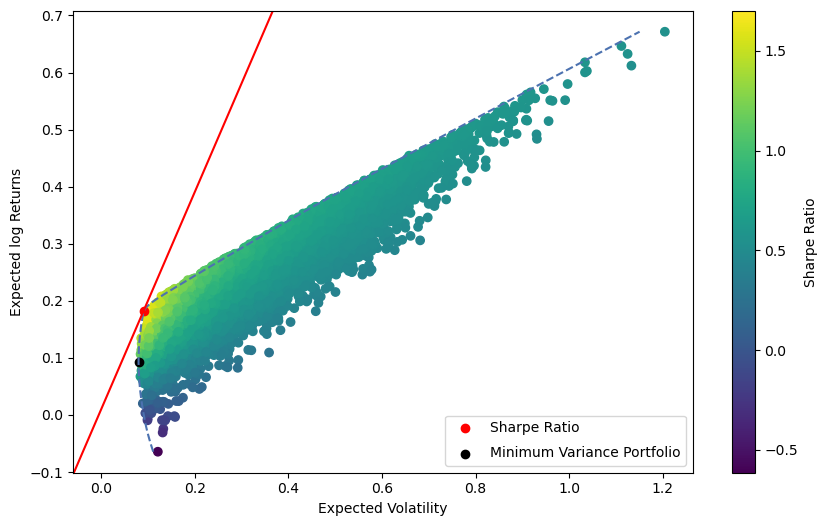

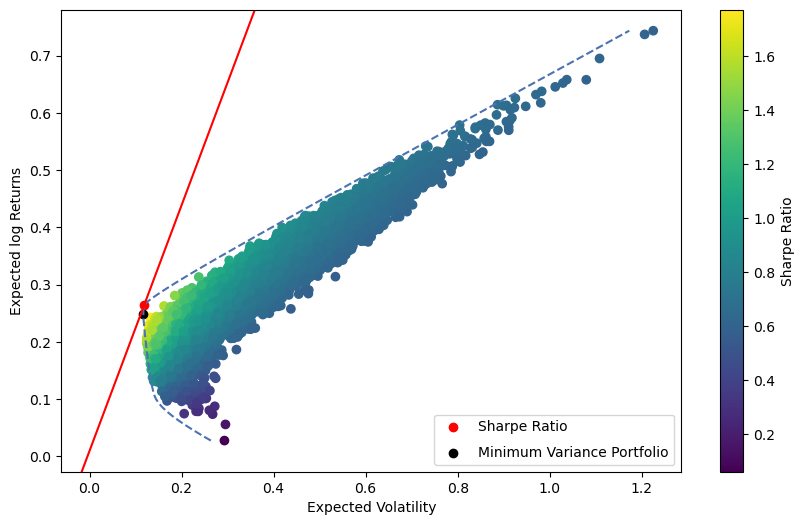

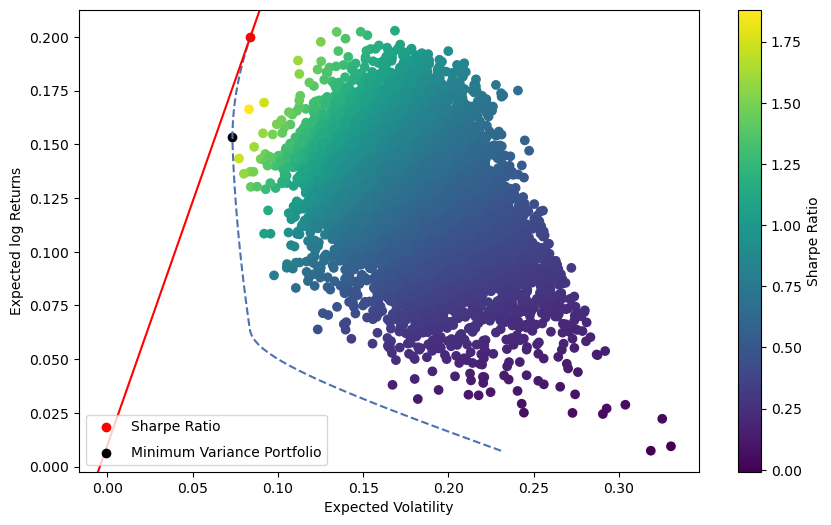

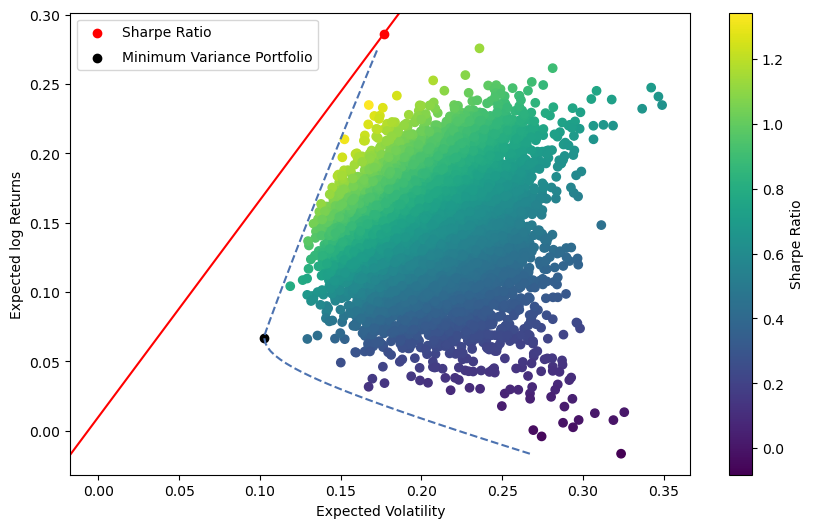

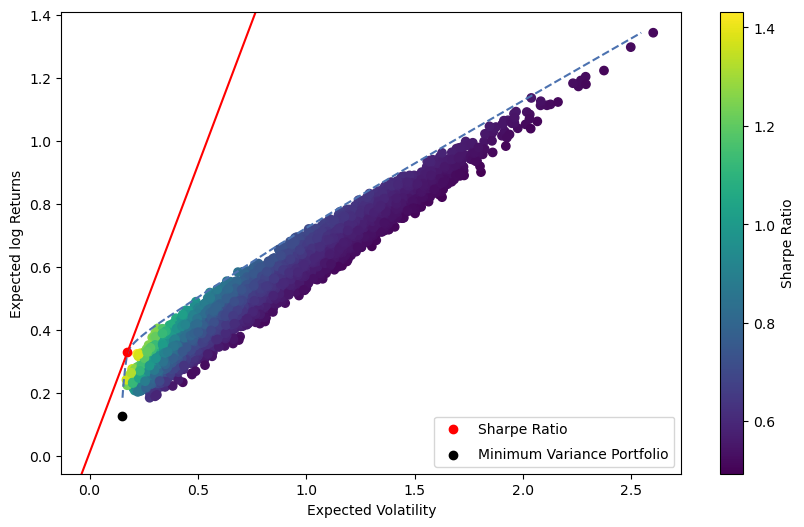

In [893]:
#Same as before but a line is added that goes between the point on the y-axis and through the optimal portfolio point
num_portfolios = 10000
opt_sharpe = []
opt_weightlist = []

counter = 0
for i in range(0,5):
    R_f_point = [0,0.01]
    expectedReturn, expectedVolatility, SharpeRatio, volatility_opt, sharpepoint, y_axis, x_axis, weightlist, mvp_exr, mvp_std, w, ticker = portfolio_performance(er[i],cova[i].to_numpy(),num_portfolios,riskfree_rate=0.01)
    opt_sharpe.append(sharpepoint)
    opt_weightlist.append(weightlist)
    print("For rolling window= ",i)
    print("The maximum Sharpe ratio portfolio is:")
    print(f"Returns: {sharpepoint[0] * 100:.2f}%")
    print(f"Volatility: {sharpepoint[1]* 100:.2f}%")
    print(f"Max sharpe ratio: {sharpepoint[2]:.2f}")
    print("\n")
    plt.figure(figsize=(10,6))
    plt.scatter(expectedVolatility, expectedReturn, c = SharpeRatio)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected log Returns')
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(sharpepoint[1], sharpepoint[0], c='red', label='Sharpe Ratio')
    plt.scatter(mvp_std, mvp_exr, c='black', label='Minimum Variance Portfolio')
    plt.plot(volatility_opt, y_axis, '--')
    plt.axline(R_f_point,(sharpepoint[1],sharpepoint[0]),color='red')
    plt.legend(labelspacing=0.8)
    name = "rollingwindow" + str(counter) +".png"
    #plt.savefig(name)
    counter += 1

## How much should be invested in the risk free asset

In [832]:
opt_sharpe = np.array(opt_sharpe)
opt_sharpe

array([[0.18290035, 0.09080177, 1.90415188],
       [0.26501419, 0.11894095, 2.14404036],
       [0.20000955, 0.08385749, 2.26586247],
       [0.28620728, 0.17673775, 1.56280862],
       [0.32920671, 0.17497014, 1.82434965]])

In [833]:
#Helper function to find the amount that should be invested in the risk free asset and the risky asset
def tobin_solve(rf,opt_sharpe,target):
    tobin_weights = []
    tobin_vol = []
    for i in range(0,5):
        vol = opt_sharpe[i,1]
        exp = opt_sharpe[i,0]
        print("For i=",i)
        #print("Exp=",exp)
        #print("Vol=",vol)
        
        y = symbols('y')
        expr = rf+((exp-rf)/vol)*y-target

        vol_c = solve(expr)
        
        x = vol_c/vol
        
        tobin_exp = (1-x)*rf + x *exp
        
        print("Amount invested in risky asset=",x[0])
        print("Expected return =",tobin_exp[0])
        print("Expected vol=",vol_c[0])
        print("\n")
        
        tobin_vol.append(vol_c)
        tobin_weights.append(x[0])
    return tobin_weights, tobin_vol

In [834]:
rf = 0.01
target = 0.10
tobin_weights, tobin_vol = tobin_solve(rf,opt_sharpe,target)
print(tobin_weights)

For i= 0
Amount invested in risky asset= 0.520531031420877
Expected return = 0.100000000000000
Expected vol= 0.0472651373680151


For i= 1
Amount invested in risky asset= 0.352921533332258
Expected return = 0.0999999999999999
Expected vol= 0.0419768217417289


For i= 2
Amount invested in risky asset= 0.473660406631350
Expected return = 0.100000000000000
Expected vol= 0.0397199747187065


For i= 3
Amount invested in risky asset= 0.325842245494160
Expected return = 0.0999999999999997
Expected vol= 0.0575886251464390


For i= 4
Amount invested in risky asset= 0.281948961254989
Expected return = 0.100000000000000
Expected vol= 0.0493326484317733


[0.520531031420877, 0.352921533332258, 0.473660406631350, 0.325842245494160, 0.281948961254989]
